![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix



X_train = pd.read_csv('X_train_df.csv')
X_test = pd.read_csv('X_test_df.csv')
y_train = pd.read_csv('./train/y_train.txt', header=None)
y_test = pd.read_csv('./test/y_test.txt', header=None)

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [17]:
%%time 

prcomp = PCA().fit(X_train)

n_componentes = X_train.shape[1]

pc_train = prcomp.transform(X_train)



nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

principalDf = pd.DataFrame(data = pc_train
             , columns = nomes_pca)

CPU times: user 1.72 s, sys: 234 ms, total: 1.95 s
Wall time: 654 ms


In [18]:
prcomp.explained_variance_ratio_

array([9.99987332e-01, 7.70791768e-06, 6.06407574e-07, 5.09832051e-07,
       3.64816639e-07, 2.27618351e-07, 2.08952462e-07, 1.54831715e-07,
       1.42217821e-07, 1.31445901e-07, 1.18965711e-07, 1.06024703e-07,
       9.27454420e-08, 8.27300177e-08, 7.05640294e-08, 6.68126958e-08,
       6.06800774e-08, 5.81648578e-08, 5.59683899e-08, 5.31998713e-08,
       5.19727704e-08, 5.06799804e-08, 4.84409404e-08, 4.58932985e-08,
       4.34318971e-08, 4.17777558e-08, 3.99234568e-08, 3.90222209e-08,
       3.72048947e-08, 3.60410185e-08, 3.53843383e-08, 3.44728665e-08,
       3.29851929e-08, 3.25304054e-08, 3.15324315e-08, 2.87626670e-08,
       2.82799942e-08, 2.75521267e-08, 2.68807107e-08, 2.57345159e-08,
       2.55118764e-08, 2.52538821e-08, 2.37709783e-08, 2.32929932e-08,
       2.23066605e-08, 2.18492527e-08, 2.09405518e-08, 1.97717596e-08,
       1.93562461e-08, 1.93095480e-08, 1.88580404e-08, 1.84290193e-08,
       1.79250731e-08, 1.72323028e-08, 1.68510925e-08, 1.56086258e-08,
      

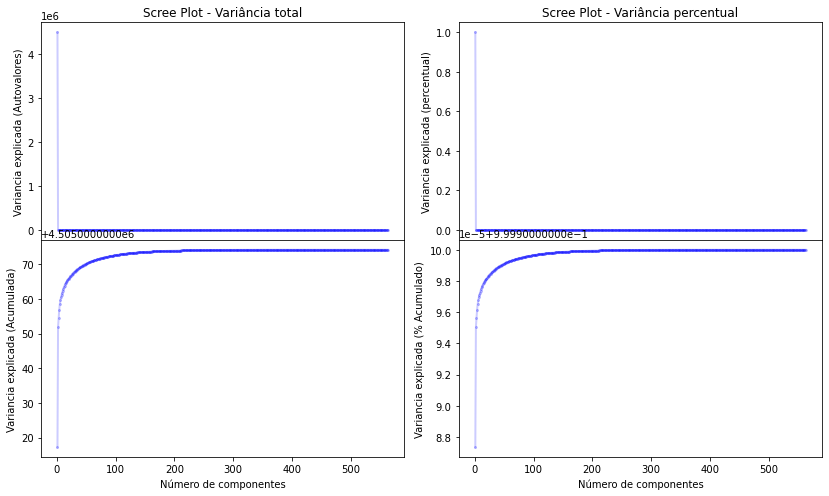

In [21]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = prcomp.explained_variance_[0]

num_componentes = np.arange(prcomp.n_components_) + 1
ax[0,0].plot(num_componentes, prcomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, prcomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = prcomp.explained_variance_ratio_[0]
#x[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, prcomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, prcomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

In [14]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: user 233 ms, sys: 211 µs, total: 233 ms
Wall time: 234 ms


,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Identificador
0,-1.731697,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,...,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567,-1.828727
1,-1.731226,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,...,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875,-1.828727
2,-1.730755,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,...,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501,-1.828727
3,-1.730284,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,...,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712,-1.828727
4,-1.729813,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,...,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222,-1.828727


In [41]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_test_pad.head()

CPU times: user 199 ms, sys: 0 ns, total: 199 ms
Wall time: 199 ms


,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Identificador
0,-1.731169,-0.277661,-0.210595,2.192704,-0.787134,-0.833071,-0.093428,-0.807954,-0.838871,-0.104160,...,-0.166362,-0.344707,0.003565,0.357512,-1.363669,0.575389,-0.404722,0.622618,-0.038342,-1.580557
1,-1.729994,0.198626,0.182560,-0.250221,-0.876836,-0.928903,-0.857905,-0.896993,-0.928791,-0.863122,...,0.490938,0.012254,-0.264048,0.030782,-0.747105,1.870875,-0.361677,0.636623,-0.145684,-1.580557
2,-1.728819,0.024583,-0.318001,-0.228446,-0.921442,-0.933896,-0.906953,-0.916735,-0.933654,-0.912484,...,0.274775,-0.134966,-0.119651,0.445996,0.037913,0.323883,-0.370869,0.632738,-0.126834,-1.580557
3,-1.727644,-0.061047,-0.572940,-0.213673,-0.923681,-0.940657,-0.918926,-0.918996,-0.941439,-0.927619,...,-0.210642,-0.441639,-0.066432,0.338455,0.472614,0.625768,-0.363372,0.645167,-0.117565,-1.580557
4,-1.726468,0.013820,-0.387815,-0.494555,-0.921523,-0.928878,-0.949818,-0.915977,-0.923689,-0.951235,...,-0.810389,-0.796804,-0.022272,-0.098513,1.097162,-0.201965,-0.350197,0.665544,-0.104100,-1.580557


In [23]:

n_componentes = X_train_pad.shape[1]

pc_train = prcomp.transform(X_train_pad)

nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

principalDf = pd.DataFrame(data = pc_train
             , columns = nomes_pca)

principalDf.head(2)

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP554,CP555,CP556,CP557,CP558,CP559,CP560,CP561,CP562,CP563
0,-16.119303,2.178199,3.080676,-0.270259,6.789765,-3.995650,3.083156,-5.226535,-0.662503,-3.651824,...,-1.838793e-16,-3.717179e-16,3.223573e-16,3.972070e-16,4.917229e-16,-5.553146e-16,2.826431e-16,1.137008e-16,-3.204874e-14,3.564218e-16
1,-15.277017,1.413838,-0.745163,2.815166,4.255529,-1.865562,0.105759,-2.219188,0.657863,-0.187714,...,4.409414e-17,-1.061619e-16,4.876771e-17,-5.712456e-17,1.615606e-16,-5.911444e-16,1.838300e-16,-3.830025e-17,3.870453e-15,-1.235470e-15


In [24]:
prcomp.explained_variance_ratio_

array([5.06033061e-01, 6.55794004e-02, 2.79793959e-02, 2.49506017e-02,
       1.88162816e-02, 1.72244889e-02, 1.36660711e-02, 1.20867898e-02,
       9.98829264e-03, 9.61745157e-03, 8.58211518e-03, 7.99109876e-03,
       7.73097558e-03, 6.55004748e-03, 6.33993098e-03, 5.97793625e-03,
       5.86735147e-03, 5.73370365e-03, 5.67174986e-03, 5.25609942e-03,
       5.03535224e-03, 4.94840924e-03, 4.86531101e-03, 4.68214139e-03,
       4.53068163e-03, 4.28070204e-03, 4.17433715e-03, 4.08804306e-03,
       3.94554507e-03, 3.85933976e-03, 3.66624214e-03, 3.56038105e-03,
       3.53047677e-03, 3.36919243e-03, 3.34532147e-03, 3.27149974e-03,
       3.22438221e-03, 2.95303345e-03, 2.93623507e-03, 2.84351640e-03,
       2.79164830e-03, 2.64807051e-03, 2.62474374e-03, 2.58588082e-03,
       2.52270958e-03, 2.46102844e-03, 2.44582955e-03, 2.39633078e-03,
       2.34557286e-03, 2.27089242e-03, 2.23661083e-03, 2.16423014e-03,
       2.06986217e-03, 2.05826872e-03, 2.00669875e-03, 1.99017615e-03,
      

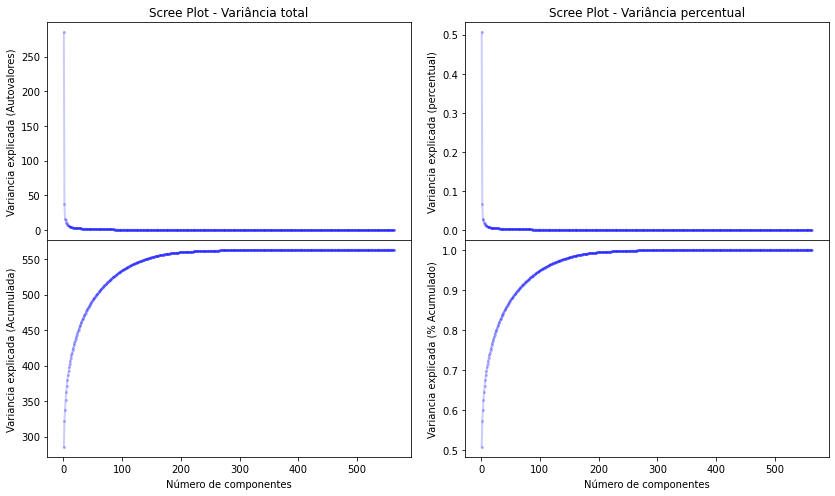

In [25]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = prcomp.explained_variance_[0]

num_componentes = np.arange(prcomp.n_components_) + 1
ax[0,0].plot(num_componentes, prcomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, prcomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = prcomp.explained_variance_ratio_[0]
#x[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, prcomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, prcomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [39]:
%%time
#SEM PADRONIZAÇÃO
clf = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)
pca = PCA(n_components=10).fit(X_train)

pc_train = pca.transform(X_train)
pc_test = pca.transform(X_test)

clf.fit(pc_train, y_train)

pc_train_score = clf.score(pc_train, y_train)
pc_test_score = clf.score(pc_test, y_test)

CPU times: user 941 ms, sys: 6.65 ms, total: 948 ms
Wall time: 437 ms


In [40]:
print(f'Acurácia do modelo na base de treino com PCA é de: {round(pc_train_score, 3) * 100}%')
print(f'Acurácia do modelo na base de teste com PCA é de: {round(pc_test_score, 3) * 100}%')

Acurácia do modelo na base de treino com PCA é de: 90.3%
Acurácia do modelo na base de teste com PCA é de: 71.5%


In [42]:
#COM PADRONIZAÇÃO

pca = PCA(n_components=10).fit(X_train_pad)

pc_train_pad = pca.transform(X_train_pad)
pc_test_pad = pca.transform(X_test_pad)

clf.fit(pc_train_pad, y_train)

pc_train_pad_score = clf.score(pc_train_pad, y_train)
pc_test_pad_score = clf.score(pc_test_pad, y_test)

In [43]:
print(f'Acurácia do modelo na base de treino com PCA padronizado é de: {round(pc_train_pad_score, 3) * 100}%')
print(f'Acurácia do modelo na base de teste com PCA padronizado é de: {round(pc_test_pad_score, 3) * 100}%')

Acurácia do modelo na base de treino com PCA padronizado é de: 86.3%
Acurácia do modelo na base de teste com PCA padronizado é de: 77.60000000000001%


In [56]:
scores = [[pc_train_score, pc_test_score], [pc_train_pad_score, pc_test_pad_score]]

scores_df = pd.DataFrame(scores, columns=['Treino', 'Teste'])

scores_fin = scores_df.T

In [60]:
scores_fin.rename(columns={0:'Padronizado', 1:'Não Padronizado'})

,Padronizado,Não Padronizado
Treino,0.903292,0.862622
Teste,0.714964,0.776043
